In [13]:
import os
from ast import literal_eval
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [14]:
df = pd.DataFrame()

In [15]:
for alg in ["mmd", "mmdew"]:
    for dataset in ["laplace", "mixed", "uniform"]:
        directory = f"../../results_rebuttal/{dataset}/n=10000/{alg}"
        files = os.listdir(directory)
        for f in files:
            df = pd.concat((df,pd.read_csv(directory + "/" + f, index_col=0)))

In [16]:
df

,algorithm,dataset,actual_cps,detected_cps,detected_cps_at,runtime,config,rep
0,MMD,Laplace10000,[],[],[],35.671413,$\alpha = 0.021544346900318832$,0
0,MMD,Laplace10000,[],[],[],34.979532,$\alpha = 0.021544346900318832$,1
0,MMD,Laplace10000,[],[],[],35.840467,$\alpha = 0.021544346900318832$,2
0,MMD,Laplace10000,[],[],[],35.629215,$\alpha = 0.021544346900318832$,3
0,MMD,Laplace10000,[],[],[],39.037795,$\alpha = 0.021544346900318832$,4
...,...,...,...,...,...,...,...,...
0,MMDEW,Uniform10000,[],[],[],23.520221,$\alpha = 0.01$,95
0,MMDEW,Uniform10000,[],[],[],23.297771,$\alpha = 0.01$,96
0,MMDEW,Uniform10000,[],[],[],23.362972,$\alpha = 0.01$,97
0,MMDEW,Uniform10000,[],[],[],23.751435,$\alpha = 0.01$,98


In [17]:
df["alpha"] = df["config"].str[10:-1].astype(float)

In [18]:
for col in ["detected_cps_at"]:
    df.loc[:,col] = df.loc[:,col].apply(lambda x : literal_eval(x))

In [19]:
df["arl"] = df["detected_cps_at"].apply(lambda z : np.min(z + [10000]))

In [20]:
df["alg+dataset"] = df["algorithm"] + " " + df["dataset"].str[:-5]

<Axes: xlabel='alpha', ylabel='arl'>

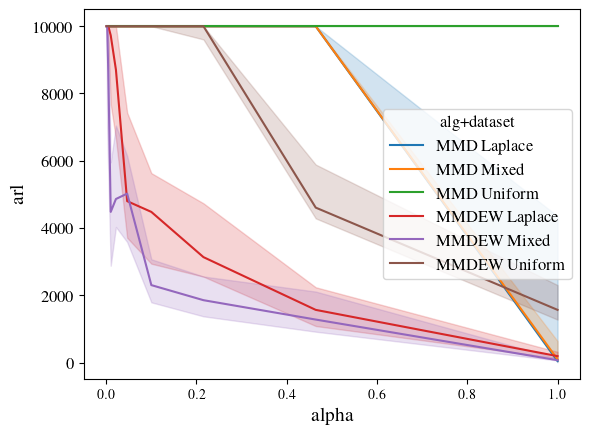

In [21]:
sns.lineplot(data=df, x="alpha", y="arl", hue="alg+dataset", estimator="median")

In [22]:
df.to_csv("../../results_rebuttal/arl-10000.csv")

In [23]:
df

,algorithm,dataset,actual_cps,detected_cps,detected_cps_at,runtime,config,rep,alpha,arl,alg+dataset
0,MMD,Laplace10000,[],[],[],35.671413,$\alpha = 0.021544346900318832$,0,0.021544,10000,MMD Laplace
0,MMD,Laplace10000,[],[],[],34.979532,$\alpha = 0.021544346900318832$,1,0.021544,10000,MMD Laplace
0,MMD,Laplace10000,[],[],[],35.840467,$\alpha = 0.021544346900318832$,2,0.021544,10000,MMD Laplace
0,MMD,Laplace10000,[],[],[],35.629215,$\alpha = 0.021544346900318832$,3,0.021544,10000,MMD Laplace
0,MMD,Laplace10000,[],[],[],39.037795,$\alpha = 0.021544346900318832$,4,0.021544,10000,MMD Laplace
...,...,...,...,...,...,...,...,...,...,...,...
0,MMDEW,Uniform10000,[],[],[],23.520221,$\alpha = 0.01$,95,0.010000,10000,MMDEW Uniform
0,MMDEW,Uniform10000,[],[],[],23.297771,$\alpha = 0.01$,96,0.010000,10000,MMDEW Uniform
0,MMDEW,Uniform10000,[],[],[],23.362972,$\alpha = 0.01$,97,0.010000,10000,MMDEW Uniform
0,MMDEW,Uniform10000,[],[],[],23.751435,$\alpha = 0.01$,98,0.010000,10000,MMDEW Uniform
